# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/sandippalit/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sandippalit/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/Users/sandippalit/Desktop/W207-coursework/Data/mnist-original.h5')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

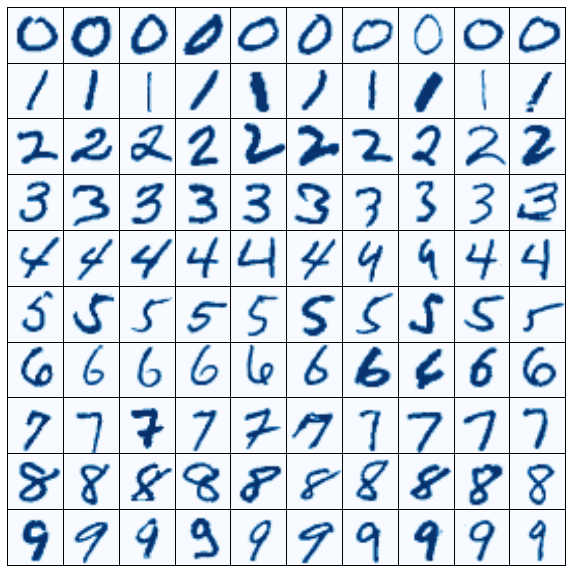

In [27]:
def P1(count_examples):
    ### STUDENT START ###
    plt.rc('image',cmap='Blues')
    plt.figure(figsize=(count_examples,len(np.unique(Y))))
    # For each digit (from 0 to 9)
    for i in np.nditer(np.unique(Y)):
        # Create a ndarray with the features of "num_examples" examples of digit "i"
        features = X[Y == i][:count_examples]
        # For each of the "num_examples" examples
        for j in range(count_examples):
            # Create subplot (from 1 to "num_digits"*"num_examples" of each digit)
            plt.subplot(len(np.unique(Y)), count_examples, i * count_examples + j + 1)
            plt.subplots_adjust(wspace=0, hspace=0)
            # Hide tickmarks and scale
            ax = plt.gca()
            # ax.set_axis_off() # Also hide axes (frame) 
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            # Plot the corresponding digit (reshaped to square matrix/image)
            dim = int(np.sqrt(X.shape[1]))
            digit = features[j].reshape((dim,dim))            
            plt.imshow(digit)


### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):
    ### STUDENT START ###
    
    accuracy = []
    # Iterate with each k and build a k-NN model
    for k in k_values:
        model = KNeighborsClassifier(k)
        model.fit(mini_train_data, mini_train_labels)
        k_score = model.score(dev_data, dev_labels)
        
        # Build classification report for k=1
        if k==1:
            predictions = model.predict(dev_data)
            print ("Classification Report for k = {}".format(k))
            print (classification_report(dev_labels, predictions))
        
        print ("Accuracy for k = {} is {:.2f}%.".format(k, k_score*100))
        accuracy.append(k_score)

 
### STUDENT END ###
k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification Report for k = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy for k = 1 is 88.80%.
Accuracy for k = 3 is 87.80%.
Accuracy for k = 5 is 86.90%.
Accuracy for k = 7 is 86.50%.
Accuracy for k = 9 is 86.30%.


ANSWER:

In [7]:
# Digit 9 is the most difficult digit, with the lowest F1 score of 0.80 and also lowest accuracy of 86.3%.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [31]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    elapsed_time = []
    # Create a 1NN model
    NN_model = KNeighborsClassifier(n_neighbors=1)
    # For different training set sizes...
    for size in train_sizes:
        # Estimate computation time
        start = time.time()
        # Fit the model with the corresponding training set
        train_data, train_labels = X[:size], Y[:size]
        NN_model.fit(train_data, train_labels)
        # Estimate the dev set accuracy
        accuracies.append(NN_model.score(dev_data, dev_labels))
        end = time.time()
        elapsed_time.append(end - start)
    print ''.join('Training size = {0:5d} => Accuracy = {1:.3f} => Elapsed time = {2:4.2f}\n'.format(x,y,z) for x,y,z in 
                  zip(train_sizes, accuracies, elapsed_time))
  
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training size =   100 => Accuracy = 0.720 => Elapsed time = 0.15
Training size =   200 => Accuracy = 0.786 => Elapsed time = 0.23
Training size =   400 => Accuracy = 0.841 => Elapsed time = 0.40
Training size =   800 => Accuracy = 0.884 => Elapsed time = 0.89
Training size =  1600 => Accuracy = 0.902 => Elapsed time = 1.71
Training size =  3200 => Accuracy = 0.926 => Elapsed time = 4.20
Training size =  6400 => Accuracy = 0.937 => Elapsed time = 7.91
Training size = 12800 => Accuracy = 0.959 => Elapsed time = 15.17
Training size = 25000 => Accuracy = 0.970 => Elapsed time = 38.46



In [32]:
 # Computation Time grows almost linearly with training set size

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Accuracy for n = 60000 (y=a+bX): [1.2430722603554991]
Accuracy for n = 60000 (y=a+b*log(X)):  [1.0338651375722188]
Accuracy for n = 60000 (y=a+b*log(X)): [1.012684887017079]


/Users/sandippalit/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/sandippalit/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/sandippalit/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using 

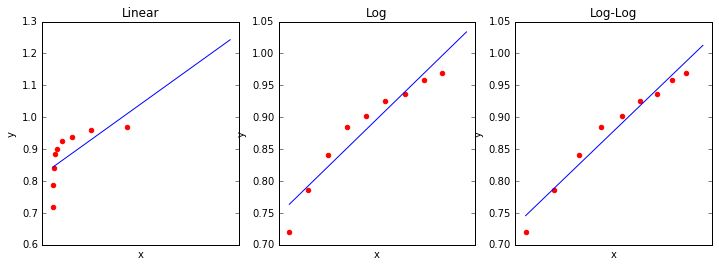

In [33]:
def P4():

### STUDENT START ###
    # First we traspose the features (training set size) and labels (accuracy)
    X = np.array(train_sizes)[:,np.newaxis]
    y = np.array(accuracies)[:,np.newaxis]
    regression_model = LinearRegression()
    regression_model .fit(X, y)
    print 'Accuracy for n = 60000 (y=a+bX):',regression_model.predict([60000]).tolist()[0]
    # The predicted value for n = 6000 exceeds 1 which is not possible
    
    # Plot regression line and the examples used to fit the model    
    plt.figure(figsize=(12, 4))
    ax = plt.subplot(1, 3, 1)
    plt.setp(ax, xticks=())
    x = np.linspace(X.min(), 60000, 100)[:,np.newaxis]
    plt.plot(x, regression_model .predict(x))
    plt.scatter(X, y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Linear')
   
    # we can observe that the corresponding value of Y for that value of X is greater than 1 (maximum possible accuracy) 

    # Let's try to transform X, using its log instead
    logX = np.log10(X)
    regression_model .fit(logX, y)
    print 'Accuracy for n = 60000 (y=a+b*log(X)): ',regression_model.predict(np.log10([60000])).tolist()[0]
    # The accuracy still exceeds 1 but not so much
    # Moreover, the graph shows that the model fits the data much better (the examples are more aligned to the regression line)
    ax = plt.subplot(1, 3, 2)
    plt.setp(ax, xticks=())
    x = np.linspace(np.log10(X.min()), np.log10(60000), 100)[:,np.newaxis]
    plt.plot(x, regression_model .predict(x))
    plt.scatter(np.log10(X), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Log')


    # And finally the log of the log of X (because log(X) vs. y was still a concave curve
    log_logX = np.log10(np.log10(X))
    regression_model .fit(log_logX, y)
    print 'Accuracy for n = 60000 (y=a+b*log(X)):',regression_model.predict(np.log10(np.log10([60000]))).tolist()[0]
    # Now the predicted value is very close to 1: we just would have to make a small adjustment, 
    # or even accept this model as valid if we don't expect to use samples so large 
    ax = plt.subplot(1, 3, 3)
    plt.setp(ax, xticks=())
    x = np.linspace(np.log10(np.log10(X.min())), np.log10(np.log10(60000)), 100)[:,np.newaxis]
    plt.plot(x, regression_model .predict(x))
    plt.scatter(np.log10(np.log10(X)), y, color='red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Log-Log')
### STUDENT END ###

P4()

ANSWER:The Linear Regression model predicts an accuracy of 124% for n=60000. 
Since accuracy cannot exceed 1.0, the Linear Regression model will yield impossible results.
The log-log transformation is the best fit but the prediction accuracy is still little over 100%.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Confusion Matrix for 1-NN: Expected vs. Predicted
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4 

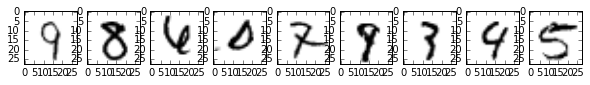

In [35]:
def P5():

### STUDENT START ###
    nn_model = KNeighborsClassifier(n_neighbors=1)
    nn_model.fit(mini_train_data, mini_train_labels)
    dev_predictions = nn_model.predict(dev_data)
    print classification_report(dev_labels, dev_predictions, 
                                target_names=['0','1','2','3','4','5','6','7','8','9'])  
    cm = confusion_matrix(dev_labels, dev_predictions)
    print "Confusion Matrix for 1-NN: Expected vs. Predicted"
    print cm
    dev_results_incorrect = (dev_predictions != dev_labels)
    dev_data_incorrect = dev_data[dev_results_incorrect]
    dev_predictions_incorrect = dev_predictions[dev_results_incorrect]
    dev_labels_incorrect = dev_labels[dev_results_incorrect]
    
    fig = plt.figure(figsize=(10,10))
    for i in range(9):
        print "Predicted:", dev_predictions_incorrect[i], "Actual:", dev_labels_incorrect[i]
        plt.subplot(1,9,i+1)
        plt.imshow(dev_data_incorrect[i].reshape((28,28)), cmap=plt.cm.binary)
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [36]:
def P6():
    
### STUDENT START ###
    # function to preprocess data, blurs data points by averaging neighbors in a 28x28 grid
    def blur_pixels(array):
        blurred = []
        for pixel in array:
            if pixel < 28: # skip the first row so we aren't blurring based on last row
                blurred.append(pixel)
            elif pixel > 756: # skip the last row so we aren't blurring based on first row
                blurred.append(pixel)
            else:
                try:
                    blurred.append(np.mean([array[pixel-29], array[pixel-28], array[pixel-27],
                                            array[pixel-1], array[pixel], array[pixel+1],
                                            array[pixel+27], array[pixel+28], array[pixel+29]]))
                except:
                    blurred.append(pixel)
        return blurred
    
    # preprocess the mini_train_data
    # start by making a numpy copy just we don't overwrite the training set
    mini_copy = mini_train_data.copy()
    mini_train_blurred = []
    for item in mini_copy:
        mini_train_blurred.append(blur_pixels(item))
    mini_train_blurred = np.array(mini_train_blurred)
    
    # preprocess the dev_data
    # start by making a numpy copy just we don't overwrite the training set
    dev_copy = dev_data.copy()
    dev_data_blurred = []
    for item in dev_copy:
        dev_data_blurred.append(blur_pixels(item))
    dev_data_blurred = np.array(dev_data_blurred)
    
    # fit models to blurred and unblurred versions of data 
    nn_model = KNeighborsClassifier(n_neighbors=1)
    nn_model.fit(mini_train_data, mini_train_labels)
    print 'Unblurred:', nn_model.score(dev_data, dev_labels)
    
    nn_model2 = KNeighborsClassifier(n_neighbors=1)
    nn_model2.fit(mini_train_blurred, mini_train_labels)
    print 'mini_train_data blurred, dev_data unblurred:', nn_model2.score(dev_data, dev_labels)
    
    nn_model3 = KNeighborsClassifier(n_neighbors=1)
    nn_model3.fit(mini_train_data, mini_train_labels)
    print 'mini_train_data, but dev_data blurred:', nn_model3.score(dev_data_blurred, dev_labels)
    
    nn_model4 = KNeighborsClassifier(n_neighbors=1)
    nn_model4.fit(mini_train_blurred, mini_train_labels)
    print 'mini_train_data blurred and dev_data blurred:', nn_model4.score(dev_data_blurred, dev_labels)
    
### STUDENT END ###

P6()

Unblurred: 0.888
mini_train_data blurred, dev_data unblurred: 0.888
mini_train_data, but dev_data blurred: 0.888
mini_train_data blurred and dev_data blurred: 0.888


ANSWER:

In [37]:
# There is no evidence of difference in blurring the digits.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

Accuracy of Binomial NB: 0.818
Accuracy of Multinomial NB: 0.802


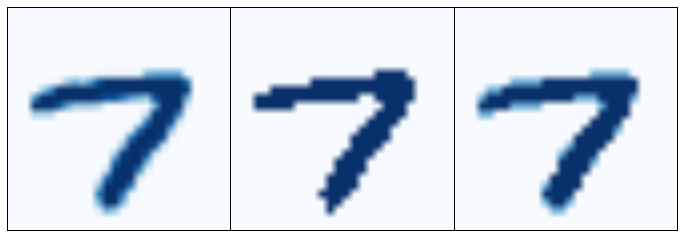

In [39]:
def P7():

### STUDENT START ###
    # Binomial NB
    BinomialNB_model = BernoulliNB(binarize=0.333)
    # I use the argument given by the function
    # To binarize the datasets we could also use a simpler version of the transformation used below, in Multinomial NB
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    print 'Accuracy of Binomial NB: {0:.3f}'.format(BinomialNB_model.score(dev_data, dev_labels))
    
    # Multinomial NB
    MultinomialNB_model = MultinomialNB()
    trinarized_train_data = np.where((mini_train_data > 0.333) & (mini_train_data < 0.667), 1, 
                                     np.where(mini_train_data > 0.333, 2, 0))
    trinarized_dev_data = np.where((dev_data > 0.333) & (dev_data < 0.667), 1, np.where(dev_data > 0.333, 2, 0))
    MultinomialNB_model.fit(trinarized_train_data, mini_train_labels)
    print 'Accuracy of Multinomial NB: {0:.3f}'.format(MultinomialNB_model.score(trinarized_dev_data, dev_labels))
    
    # An example of how a random digit looks like after binarizing or trinarizing its pixels
    dim = int(np.sqrt(X.shape[1]))
    random_image = X[np.random.choice(X.shape[0])]
    plt.rc('image', cmap='Blues')
    plt.figure(figsize=(12,4), dpi=X.shape[1])
    plt.subplot(1, 3, 1)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.imshow(random_image.reshape(dim,dim))
    plt.subplot(1, 3, 2)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    binarized_random_image = np.where(random_image < 0.5, 0, 1)
    plt.imshow(binarized_random_image.reshape(dim,dim))
    # The image becomes much more defined
    plt.subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    trinarized_random_image = np.where((random_image > 0.333) & (random_image < 0.667), 0.5, 
                                       np.where(random_image > 0.333, 1, 0))
    plt.imshow(trinarized_random_image.reshape(dim,dim))
    # Still not as blurred as the original    
### STUDENT END ###

P7()

ANSWER:

In [40]:
# The multi class version did not improve the results

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [41]:
def P8(alphas):

### STUDENT START ###
    bnb_model = BernoulliNB(binarize=0.333)
    grid = GridSearchCV(estimator=bnb_model, param_grid=alphas)
    grid.fit(mini_train_data, mini_train_labels)
    print grid
    print grid.grid_scores_
    print grid.best_score_
    print grid.best_estimator_.alpha
    print grid.best_params_
    return grid

    
    
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.333, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.82400, std: 0.01626, params: {'alpha': 0.0001}, mean: 0.82500, std: 0.01531, params: {'alpha': 0.001}, mean: 0.82500, std: 0.01507, params: {'alpha': 0.01}, mean: 0.82000, std: 0.01903, params: {'alpha': 0.1}, mean: 0.81400, std: 0.01236, params: {'alpha': 0.5}, mean: 0.80700, std: 0.00717, params: {'alpha': 1.0}, mean: 0.79900, std: 0.01046, params: {'alpha': 2.0}, mean: 0.73900, std: 0.01789, params: {'alpha': 10.0}]
0.825
0.001
{'alpha': 0.001}


In [46]:
print nb.best_params_
print nb.best_score_


{'alpha': 0.001}
0.825


ANSWER:

In [47]:
# The best score of 0.825 occurred with alpha=0.01.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Accuracy of Gaussian NB: 0.621
Best approximate value of sigma: 0.20
Accuracy of new GaussianNB = 0.812


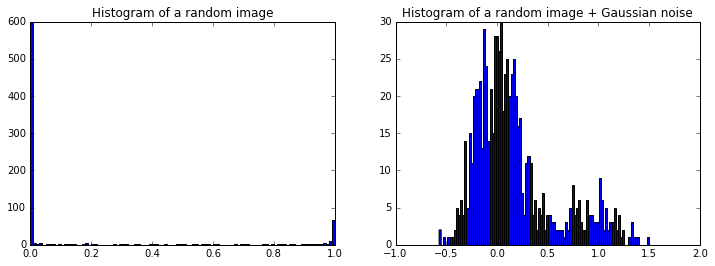

In [51]:
def P9():

### STUDENT END ###
    # Create a Gaussian NB model
    GaussianNB_model = GaussianNB()
    # Fit the model with the mini training set
    GaussianNB_model.fit(mini_train_data, mini_train_labels)
    # Report accuracy for the dev set
    print 'Accuracy of Gaussian NB: {0:.3f}'.format(GaussianNB_model.score(dev_data,dev_labels))
    
    
    # This model expects the features to be normally distributed but they're almost binary (0 or 1), 
    # that's why the Binomial NB model works better.
    # Let's plot the histogram of a random digit to prove it,
    # together with the histogram of its features when  gaussian noise is added.
    random_image = X[np.random.choice(X.shape[0])]
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    fig = plt.hist(random_image, 100)
    plt.title('Histogram of a random image')
    plt.subplot(1, 2, 2)
    fig = plt.hist(random_image + np.random.normal(0, 0.2, random_image.shape), 100)
    plt.title('Histogram of a random image + Gaussian noise')
    
    # Explore which value of sigma maximizes accuracy
    sigmas = np.arange(0.05, 1.05, 0.05)
    accuracies = np.zeros(sigmas.shape)
    for i in range(sigmas.shape[0]):
        new_train_data = mini_train_data + np.random.normal(0,sigmas[i], mini_train_data.shape)
        new_dev_data = dev_data + np.random.normal(0,sigmas[i], mini_train_data.shape)
        GaussianNB_model.fit(new_train_data, mini_train_labels)
        accuracies[i] = GaussianNB_model.score(new_dev_data, dev_labels)
    sigma=sigmas[accuracies.argmax()]
    print 'Best approximate value of sigma: {0:.2f}'.format(sigma)
    
    new_train_data = mini_train_data + np.random.normal(0,sigma,mini_train_data.shape)
    new_dev_data = dev_data + np.random.normal(0,sigma,mini_train_data.shape)
    GaussianNB_model.fit(new_train_data, mini_train_labels)
    print 'Accuracy of new GaussianNB = {0}'.format(GaussianNB_model.score(new_dev_data, dev_labels))
    return GaussianNB_model
### STUDENT END ###

gnb = P9()

ANSWER:

In [52]:
# The Gaussian NB model expects the features to be normally distributed, but here they're almost binary distributed
#(0 in most of the pixels, or 1). Binomial NM Model is more suitable.
# By adding gaussian noise (of mean zero and the standard deviation that maximizes the accuracy on the dev set), 
# the features of the preprocessed images follow a distribution closer to normality.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

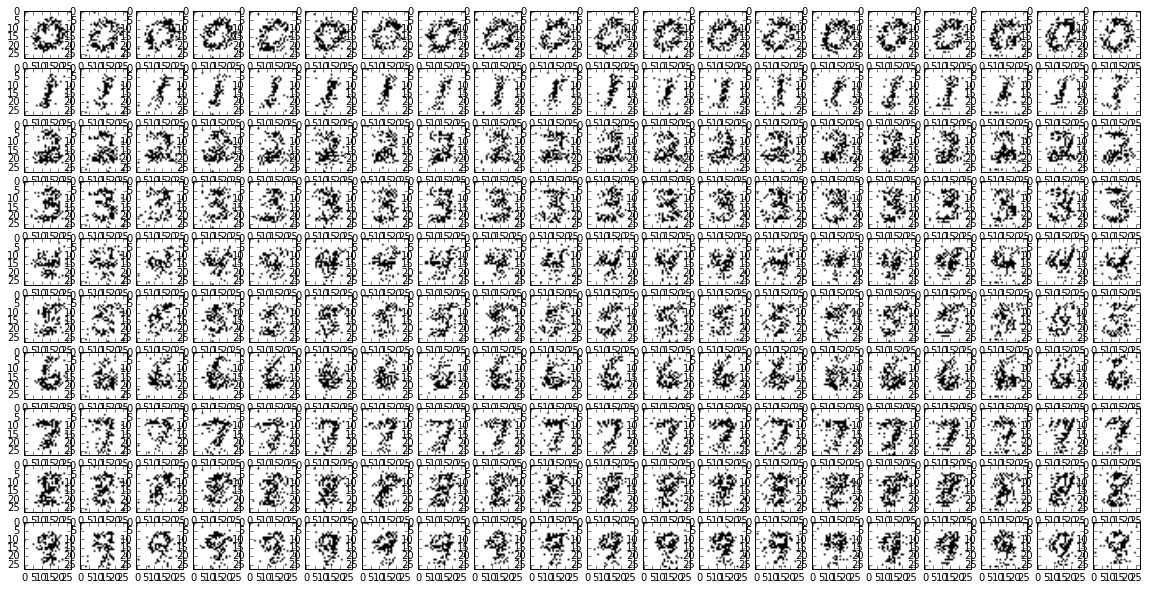

In [53]:
def P10(num_examples):

### STUDENT START ###
    bnb_model = BernoulliNB(binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)
    probs = np.exp(bnb_model.feature_log_prob_)
    
    # generate 20 random 'digits', which are 784 features
    rand_digits = np.random.rand(20,784)
    
    #start creating 20 examples of each digit
    zeroes = np.copy(rand_digits)
    # Assign all pixels whose probability is greater than its value to 1 
    zeroes[zeroes <= probs[0]] = 1
    # Set all other pixels to 0 
    zeroes[zeroes != 1] = 0
    # repeat for other digits
    ones = np.copy(rand_digits)
    ones[ones <= probs[1]] = 1
    ones[ones != 1] = 0
    twos = np.copy(rand_digits)
    twos[twos <= probs[2]] = 1
    twos[twos != 1] = 0
    threes = np.copy(rand_digits)
    threes[threes <= probs[3]] = 1
    threes[threes != 1] = 0
    fours = np.copy(rand_digits)
    fours[fours <= probs[4]] = 1
    fours[fours != 1] = 0
    fives = np.copy(rand_digits)
    fives[fives <= probs[5]] = 1
    fives[fives != 1] = 0
    sixes = np.copy(rand_digits)
    sixes[sixes <= probs[6]] = 1
    sixes[sixes != 1] = 0
    sevens = np.copy(rand_digits)
    sevens[sevens <= probs[7]] = 1
    sevens[sevens != 1] = 0
    eights = np.copy(rand_digits)
    eights[eights <= probs[8]] = 1
    eights[eights != 1] = 0
    nines = np.copy(rand_digits)
    nines[nines <= probs[9]] = 1
    nines[nines != 1] = 0
    
    # Concatenate all the examples
    digits = np.concatenate((zeroes, ones, twos, threes, fours, fives, sixes, sevens, eights, nines))
    
    #then move to plot 20 of each digit
    fig = plt.figure(figsize=(20,10))
    for i in range(1,201):
        plt.subplot(10,20,i)
        plt.imshow(digits[i-1].reshape((28,28)), cmap=plt.cm.binary)
    
### STUDENT END ###

P10(20)

ANSWER:

In [22]:
# The generated digits are much more blurry than the training digits, but still recognizable.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  26    accuracy = 0.423
p(pred) <= 0.9990000000000    total =  90    accuracy = 0.456
p(pred) <= 0.9999900000000    total =  66    accuracy = 0.621
p(pred) <= 0.9999999000000    total =  64    accuracy = 0.625
p(pred) <= 0.9999999990000    total =  56    accuracy = 0.750
p(pred) <= 0.9999999999900    total =  57    accuracy = 0.807
p(pred) <= 0.9999999999999    total =  73    accuracy = 0.836
p(pred) <= 1.0000000000000    total = 568    accuracy = 0.961


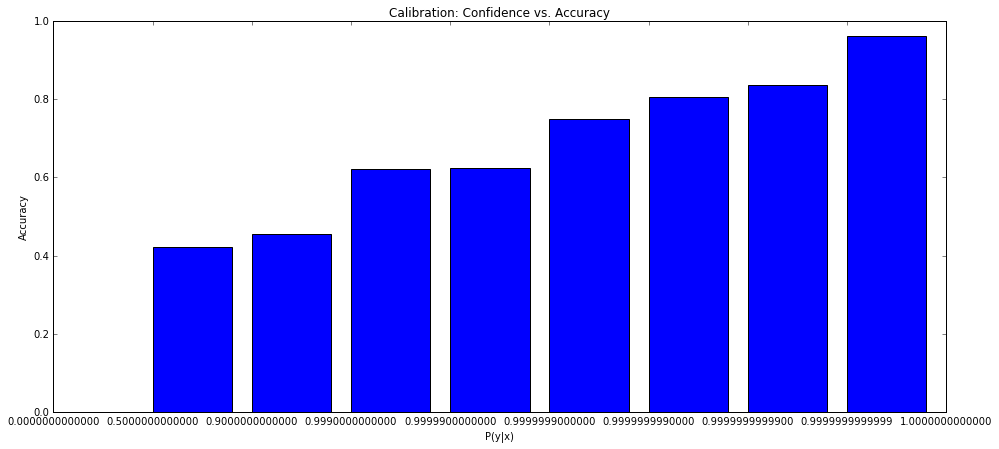

In [55]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # Create a Binomial NB model
    BinomialNB_model = BernoulliNB(alpha=nb.best_params_['alpha'], binarize=0.333)
    # Fit it with the mini training set
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    # Predict labels and probabilities of dev set
    dev_predicted_labels = BinomialNB_model.predict(dev_data)
    dev_predicted_probs = BinomialNB_model.predict_proba(dev_data)
    # Define some aux variables: buckets_copy and acc
    buckets_copy = list(buckets)
    # Each bucket ranges from the prior value to the current one: first prior value is 0 
    buckets_copy.insert(0, 0.)
    # Accuracy for each bucket 
    acc = [0.]*len(buckets)

    for i in range(1,len(buckets)+1):
       
        label_into_bucket = np.zeros(dev_predicted_labels.shape[0])
        count_correct = 0
        count_total = 0
        # For every prediction 
        for j in range(dev_predicted_probs.shape[0]):
            # Search the maximum posterior probability 
            prob = dev_predicted_probs[j, dev_predicted_probs[j].argmax()]
            # If that maximum posterior is inside the current bucket (threshold under study) , take it into account
            label_into_bucket[j] = np.where((prob <= buckets_copy[i]) & (prob > buckets_copy[i-1]), 1, 0)
            
            if label_into_bucket[j] == 1:
             
                count_total +=1
                # If prediction was correct, increase count of correct
                if dev_predicted_labels[j] == dev_labels[j]:
                    count_correct += 1
        # Count total and correct cases for each particular item
        correct[i-1] = float(count_correct)
        total[i-1] = float(count_total)
       
        if (total[i-1] > 0): acc[i-1] = correct[i-1] / total[i-1]
    
    # Display Posterior vs. Accuracy
    buck = ["{:.13f}".format(i) for i in buckets_copy]
    plt.figure(figsize=(16,7))
    fig = plt.bar(range(len(buckets)), acc)
    plt.title('Calibration: Confidence vs. Accuracy')
    plt.xlabel('P(y|x)')
    plt.ylabel('Accuracy')
    ax = plt.gca()
    ax.set_xticklabels(buck)                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()